# Lab-2.2: Cleaning record data in R and Python

*Author James Hickman, post any questions to slack* 

**Instructions** 

* Part-1: Read and work through all tutorial content and do all exercises below using python
* Part-2: Create a .rmd file, copy all markdown content into the .rmd file, and repeat all coding exercises below in R instead of python (using tibbles instead of data-frames)

**Submission:**

* You need to upload TWO documents to Canvas when you are done
  * (1) A PDF (or HTML) of the completed .ipynb document (python submission) 
  * (2) A PDF (or HTML) of the completed .qmd document (R submission) 
* **BOTH ARE REQUIRED, YOU CANNOT DO JUST ONE OR THE OTHER**
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

### Cleaning record data 

In practice, there is no "one size fits all" method for data cleaning. 

How you clean the data depends on your objective and what kind of data you have (e.g. record, text, transaction,.. etc) 

Record data is very common, therefore we will focus on this as a example case, specifically the following common operations. 

* merging data frames
* Removing un-needed columns 
* Dealing with missing values and non-sense values 
* standardization 
* normalization 

We will intentionally focus on an overly simply toy data set, the focus is on the operations, not the complexity of the data

In [4]:
import pandas as pd
import numpy as np

### Read in the data 

* Use pandas to read in the "example-1.csv" and "example-2.csv" files in the folder named "data"
  
* Before moving further, open the files in VSC, install relevant .csv extensions (optional), manually expect the data and look for obvious issues 


In [5]:
# INSERT CODE TO READ THE DATA FILES (hint .. google --> "how to read csv file with pandas")
df1 = pd.read_csv("./data/example-1.csv")
df2 = pd.read_csv("./data/example-2.csv")

In [6]:
print(df1)

   customer_id  initials   age  account_balance_usd  yearly_income_usd
0            1       546    32                1232.            140230.
1            1     "JKJ"    32                1232.              "USA"
2            2     "LKS"    13               23023.             2100.0
3            3     "UKS"   -23               13023.            56000.0
4            4     "ESA"                     15023.           265000.0
5            5     "ILK"    24                                261000.0
6            6     "JKL"    53                143.            261000.0
7            7     "JKL"    53                143.            261000.0


In [7]:
print(df2)

   customer_id   num_children   is_house_owner   housing_payment_pesos country
0            1              3              0.0                 22000.0   "usa"
1            2              0              NaN                 22450.0    "US"
2            3              1              1.0                 35000.0   "USA"
3            4           1232              1.0                 23040.0   "MEX"
4            6              3              0.0                 24340.0   "mex"
5            7              3              0.0                 24140.0   "MEX"


In [8]:
# LOOK AT FIRST COUPLE LINES
print(df2.head(2))

   customer_id   num_children   is_house_owner   housing_payment_pesos country
0            1              3              0.0                 22000.0   "usa"
1            2              0              NaN                 22450.0    "US"


In [9]:
# LOOK AT LAST COUPLE LINES
print(df2.tail(2))

   customer_id   num_children   is_house_owner   housing_payment_pesos country
4            6              3              0.0                 24340.0   "mex"
5            7              3              0.0                 24140.0   "MEX"


Notice that some column names have spaces, lets get rid of those

In [10]:
## INSERT CODE TO REMOVE SPACES FROM COLUMN NAMES
df1.rename(columns=lambda x: x.strip(), inplace=True)
df2.rename(columns=lambda x: x.strip(), inplace = True)

Lets also clean up some of the column names

In [11]:
# INSERT CODE TO RENAME THE COLUMN NAME "age" --> "age_years" and "country" as "country_of_origin"
# PRINT THE MODIFIED COLUMN NAMES WHEN DONE

df2.rename(columns = {'country':'countrdf1.rename(columns = {'age':'age_years'}, inplace = True)y_of_origin'}, inplace = True)

print('df1 columns: ', df1.columns)
print('df2 columns: ', df2.columns)

df1 columns:  Index(['customer_id', 'initials', 'age_years', 'account_balance_usd',
       'yearly_income_usd'],
      dtype='object')
df2 columns:  Index(['customer_id', 'num_children', 'is_house_owner',
       'housing_payment_pesos', 'country_of_origin'],
      dtype='object')


### Standardizing values 

Standardization typically means forcing everything to use the same "standard" units 

For example, making sure all weights are in lb, all money values are in USD, etc. 

You can typically use any units, it doesn't really matter which you choose as long as everything is the same.

It is good to do this before merging your data, because it would be very bad to have a column of data with mixed units. 

A column with mixed units is basically non-sense. 

For example, what is the meaning of averaging a vector of house prices where half of the values are USD and the other half is Pesos.


In [12]:
#INSERT CODE TO CONVERT TYPECAST "housing_payment_pesos" AS TYPE "FLOAT"
df2['housing_payment_pesos'] = df2['housing_payment_pesos'].astype(float)
print(df2['housing_payment_pesos'].dtypes)

float64


In [13]:
#INSERT CODE TO CONVERT "housing_payment_pesos" to USD
# 1 Mexican Peso = 0.050 USD
# 1 USD = 19.88 Mexican Peso

df2['housing_payment_pesos'] = df2['housing_payment_pesos'] * 0.05
print(df2['housing_payment_pesos'])

0    1100.0
1    1122.5
2    1750.0
3    1152.0
4    1217.0
5    1207.0
Name: housing_payment_pesos, dtype: float64


In [14]:
#INSERT CODE TO RENAME "housing_payment_pesos" to "housing_payment_usd"
df2.rename(columns={'housing_payment_pesos':'housing_payment_usd'}, inplace=True)
df2.columns

Index(['customer_id', 'num_children', 'is_house_owner', 'housing_payment_usd',
       'country_of_origin'],
      dtype='object')

In [15]:
# PRINT THE MODIFIED DATA FRAME
print(df2)

   customer_id  num_children  is_house_owner  housing_payment_usd  \
0            1             3             0.0               1100.0   
1            2             0             NaN               1122.5   
2            3             1             1.0               1750.0   
3            4          1232             1.0               1152.0   
4            6             3             0.0               1217.0   
5            7             3             0.0               1207.0   

  country_of_origin  
0             "usa"  
1              "US"  
2             "USA"  
3             "MEX"  
4             "mex"  
5             "MEX"  


another part of the standardization process is making sure all labels are consistently defined  

Notice how "usa", "US", etc

In [16]:
## RUN THE FOLLOWING CELL TO REMOVE ANY WHITE SPACE FROM "country_of_origin"
df2['country_of_origin']=df2['country_of_origin'].str.strip()

In [17]:
# INSERT CODE TO MAKE SURE ALL "US" TAGS equal "usa" and all "MEX" tags equal "mex"
df2['country_of_origin'] = df2['country_of_origin'].replace({'"US"':'"usa"','"MEX"':'"mex"'}) # inplace = True: saving process
df2['country_of_origin'] = df2['country_of_origin'].str.lower()
df2

,customer_id,num_children,is_house_owner,housing_payment_usd,country_of_origin
0,1,3,0.0,1100.0,"""usa"""
1,2,0,NaN,1122.5,"""usa"""
2,3,1,1.0,1750.0,"""usa"""
3,4,1232,1.0,1152.0,"""mex"""
4,6,3,0.0,1217.0,"""mex"""
5,7,3,0.0,1207.0,"""mex"""


In [18]:
# PRINT THE DATA FRAME
print(df2)

   customer_id  num_children  is_house_owner  housing_payment_usd  \
0            1             3             0.0               1100.0   
1            2             0             NaN               1122.5   
2            3             1             1.0               1750.0   
3            4          1232             1.0               1152.0   
4            6             3             0.0               1217.0   
5            7             3             0.0               1207.0   

  country_of_origin  
0             "usa"  
1             "usa"  
2             "usa"  
3             "mex"  
4             "mex"  
5             "mex"  


### Merging data sets 

The easiest way to merge data files is when a "common-key" exists (i.e. a column shared by both files) 

In our toy example the customer_id can be used as a common key 

Data sets are typically merged using SQL type join operations (inner,outer,left,right). 

See the lecture slides for examples and codes for these join operations. 

In [19]:
# INSERT CODE TO DO AN "OUTER" JOIN FOR THE TWO DATA-FRAMES USING "CUSTOMER_ID" AS COMMON KEY
# (hint .. see lecture slides)
df = df1.merge(df2, how="outer")

In [20]:
print(df)

   customer_id initials age_years account_balance_usd yearly_income_usd  \
0            1      546        32               1232.           140230.   
1            1    "JKJ"        32               1232.             "USA"   
2            2    "LKS"        13              23023.            2100.0   
3            3    "UKS"       -23              13023.           56000.0   
4            4    "ESA"                        15023.          265000.0   
5            5    "ILK"        24                              261000.0   
6            6    "JKL"        53               143.           261000.0   
7            7    "JKL"        53               143.           261000.0   

   num_children  is_house_owner  housing_payment_usd country_of_origin  
0           3.0             0.0               1100.0             "usa"  
1           3.0             0.0               1100.0             "usa"  
2           0.0             NaN               1122.5             "usa"  
3           1.0             1.0 

Notice how the merge injected "NaN" where merge wasn't possible

Notice that we also have missing values (empty cells), let's replace those with NaN. 

That way all missing values will be represented the same way

In [21]:
# INSERT CODE TO: REPLACE ALL CELLS THAT ARE ENTIRELY SPACE (OR EMPTY) WITH NAN 
# (use google to figure out how to do this)
df.replace(r'^\s*$', np.nan, regex=True, inplace = True) # regex: regular expression / inplace: save
df

,customer_id,initials,age_years,account_balance_usd,yearly_income_usd,num_children,is_house_owner,housing_payment_usd,country_of_origin
0,1,546,32,1232.,140230.,3.0,0.0,1100.0,"""usa"""
1,1,"""JKJ""",32,1232.,"""USA""",3.0,0.0,1100.0,"""usa"""
2,2,"""LKS""",13,23023.,2100.0,0.0,NaN,1122.5,"""usa"""
3,3,"""UKS""",-23,13023.,56000.0,1.0,1.0,1750.0,"""usa"""
4,4,"""ESA""",NaN,15023.,265000.0,1232.0,1.0,1152.0,"""mex"""
5,5,"""ILK""",24,NaN,261000.0,NaN,NaN,NaN,NaN
6,6,"""JKL""",53,143.,261000.0,3.0,0.0,1217.0,"""mex"""
7,7,"""JKL""",53,143.,261000.0,3.0,0.0,1207.0,"""mex"""


In [22]:
print(df)

   customer_id initials age_years account_balance_usd yearly_income_usd  \
0            1      546        32               1232.           140230.   
1            1    "JKJ"        32               1232.             "USA"   
2            2    "LKS"        13              23023.            2100.0   
3            3    "UKS"       -23              13023.           56000.0   
4            4    "ESA"       NaN              15023.          265000.0   
5            5    "ILK"        24                 NaN          261000.0   
6            6    "JKL"        53               143.           261000.0   
7            7    "JKL"        53               143.           261000.0   

   num_children  is_house_owner  housing_payment_usd country_of_origin  
0           3.0             0.0               1100.0             "usa"  
1           3.0             0.0               1100.0             "usa"  
2           0.0             NaN               1122.5             "usa"  
3           1.0             1.0 

In [23]:
# INSERT CODE TO PRINT THE SHAPE OF THE NEW DATAFRAME
df.shape

(8, 9)

Lets see how many missing values there are in each column

In [24]:
# INSERT CODE TO COUNT THE NUMBER OF MISSING VALUES IN EACH COLUMN (use google)
missing_values_num = df.isna().sum()
print(missing_values_num)

customer_id            0
initials               0
age_years              1
account_balance_usd    1
yearly_income_usd      0
num_children           1
is_house_owner         2
housing_payment_usd    1
country_of_origin      1
dtype: int64


In [25]:
# INSERT CODE TO PRINT THE COLUMN NAMES
df.columns

Index(['customer_id', 'initials', 'age_years', 'account_balance_usd',
       'yearly_income_usd', 'num_children', 'is_house_owner',
       'housing_payment_usd', 'country_of_origin'],
      dtype='object')

### Throw away un-needed columns

You don't want to remove an otherwise "good" row, just because a value is missing in a column that you don't care about.

Therefore, typically it is good to get rid of un-needed columns before removing missing values. 

Lets assume that the variables "initials" and "num_children" won't be needed for future analysis and can be thrown away

In [26]:
print(df)

   customer_id initials age_years account_balance_usd yearly_income_usd  \
0            1      546        32               1232.           140230.   
1            1    "JKJ"        32               1232.             "USA"   
2            2    "LKS"        13              23023.            2100.0   
3            3    "UKS"       -23              13023.           56000.0   
4            4    "ESA"       NaN              15023.          265000.0   
5            5    "ILK"        24                 NaN          261000.0   
6            6    "JKL"        53               143.           261000.0   
7            7    "JKL"        53               143.           261000.0   

   num_children  is_house_owner  housing_payment_usd country_of_origin  
0           3.0             0.0               1100.0             "usa"  
1           3.0             0.0               1100.0             "usa"  
2           0.0             NaN               1122.5             "usa"  
3           1.0             1.0 

In [27]:
### INSERT CODE TO REMOVE THE COLUMNS "initials" AND "num_children", 
df.drop(columns=['initials','num_children'], inplace = True)

In [28]:
# INSERT CODE TO PRINT THE NEW DATA-FRAME AND ITS SHAPE
print(df)
df.shape

   customer_id age_years account_balance_usd yearly_income_usd  \
0            1        32               1232.           140230.   
1            1        32               1232.             "USA"   
2            2        13              23023.            2100.0   
3            3       -23              13023.           56000.0   
4            4       NaN              15023.          265000.0   
5            5        24                 NaN          261000.0   
6            6        53               143.           261000.0   
7            7        53               143.           261000.0   

   is_house_owner  housing_payment_usd country_of_origin  
0             0.0               1100.0             "usa"  
1             0.0               1100.0             "usa"  
2             NaN               1122.5             "usa"  
3             1.0               1750.0             "usa"  
4             1.0               1152.0             "mex"  
5             NaN                  NaN             

(8, 7)

Before dealing with the missing values, notice that one row has "nan", which is a string, instead of the numpy NaN object.

Lets fix that. 

In [29]:
## INSERT CODE TO REPLACE THE STRING "nan" WITH NAN, PRINT THE NEW DATA-FRAME WHEN DONE
df.replace('nan', np.nan, inplace=True)
df

,customer_id,age_years,account_balance_usd,yearly_income_usd,is_house_owner,housing_payment_usd,country_of_origin
0,1,32,1232.,140230.,0.0,1100.0,"""usa"""
1,1,32,1232.,"""USA""",0.0,1100.0,"""usa"""
2,2,13,23023.,2100.0,NaN,1122.5,"""usa"""
3,3,-23,13023.,56000.0,1.0,1750.0,"""usa"""
4,4,NaN,15023.,265000.0,1.0,1152.0,"""mex"""
5,5,24,NaN,261000.0,NaN,NaN,NaN
6,6,53,143.,261000.0,0.0,1217.0,"""mex"""
7,7,53,143.,261000.0,0.0,1207.0,"""mex"""


### Dealing with non-sense values 

Often there are values in the data that are clearly NOT legitimate, such as negative ages, or strings where numbers should be.

You want to remove these before doing any averaging or other statistics because they will tamper with the results. 

For example, the average is highly sensitive to outliers, so negative ages would badly skew the mean.

In [30]:
## RUN THE FOLLOWING CODE, THIS USES A CONDITIONAL TO ONLY KEEP ROWS WHERE "age_years"=NaN 
df = df.replace("NaN", np.nan)
df = df[df['age_years'].notna()]
df

,customer_id,age_years,account_balance_usd,yearly_income_usd,is_house_owner,housing_payment_usd,country_of_origin
0,1,32,1232.,140230.,0.0,1100.0,"""usa"""
1,1,32,1232.,"""USA""",0.0,1100.0,"""usa"""
2,2,13,23023.,2100.0,NaN,1122.5,"""usa"""
3,3,-23,13023.,56000.0,1.0,1750.0,"""usa"""
5,5,24,NaN,261000.0,NaN,NaN,NaN
6,6,53,143.,261000.0,0.0,1217.0,"""mex"""
7,7,53,143.,261000.0,0.0,1207.0,"""mex"""


In [31]:
## INSERT CODE TO REPLACE ANY NEGATIVE "age_years" WITH NUMPY "NaN" OBJECT
## There are multiple ways to do this, for example you can iterate over the 
# rows and use apply with a lambda function to enforce the conditional

df['age_years'] = df['age_years'].astype(float) # change str/int to float
df['age_years'] = df['age_years'].apply(lambda x: np.nan if x < 0 else x)

In [32]:
## RUN THE FOLLOWING CELL TO REMOVE ANY WHITE SPACE FROM "yearly_income_usd"
df['yearly_income_usd']=df['yearly_income_usd'].str.strip()

In [33]:
## INSERT CODE TO REPLACE ANY "yearly_income_usd" THAT IS A STRING WITH NUMPY nan OBJECT

df['yearly_income_usd'].replace(regex='[A-Za-z]', value=np.nan, inplace=True)

In [34]:
# PRINT THE DATA FRAME
print(df)

   customer_id  age_years account_balance_usd yearly_income_usd  \
0            1       32.0               1232.           140230.   
1            1       32.0               1232.               NaN   
2            2       13.0              23023.            2100.0   
3            3        NaN              13023.           56000.0   
5            5       24.0                 NaN          261000.0   
6            6       53.0               143.           261000.0   
7            7       53.0               143.           261000.0   

   is_house_owner  housing_payment_usd country_of_origin  
0             0.0               1100.0             "usa"  
1             0.0               1100.0             "usa"  
2             NaN               1122.5             "usa"  
3             1.0               1750.0             "usa"  
5             NaN                  NaN               NaN  
6             0.0               1217.0             "mex"  
7             0.0               1207.0            

### Dealing with missing values 

There are many options to deal with missing values, some are better than others

The easiest, and probably the worst option, is to just throw out any row with NaN

In [35]:
# INSERT CODE TO THROW AWAY ANY ROW WITH "NaN" 
# JUST PRINT THE OUTPUT, DONT RE-DEFINE THE DATAFRAME
# hint: read the documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

print(df.dropna()) # just printing out
df # double-check

   customer_id  age_years account_balance_usd yearly_income_usd  \
0            1       32.0               1232.           140230.   
6            6       53.0               143.           261000.0   
7            7       53.0               143.           261000.0   

   is_house_owner  housing_payment_usd country_of_origin  
0             0.0               1100.0             "usa"  
6             0.0               1217.0             "mex"  
7             0.0               1207.0             "mex"  


,customer_id,age_years,account_balance_usd,yearly_income_usd,is_house_owner,housing_payment_usd,country_of_origin
0,1,32.0,1232.,140230.,0.0,1100.0,"""usa"""
1,1,32.0,1232.,NaN,0.0,1100.0,"""usa"""
2,2,13.0,23023.,2100.0,NaN,1122.5,"""usa"""
3,3,NaN,13023.,56000.0,1.0,1750.0,"""usa"""
5,5,24.0,NaN,261000.0,NaN,NaN,NaN
6,6,53.0,143.,261000.0,0.0,1217.0,"""mex"""
7,7,53.0,143.,261000.0,0.0,1207.0,"""mex"""


**IMPORTANT README**

Another option would be to replace the missing value with a typical value that summarizes that column, such as the mean, median, or mode. 

In practice, you need to be careful when doing this! You are essentially tampering with the data. 

You MUST document changes of this kind and be TRANSPARENT, otherwise it could be viewed as academic or professional dishonesty. 

Especially if it dramatically effects your results.

Doing so will also effect all future analysis, since you are forcing a data point to become an "average" data point. 

For example, if you were looking for good basketball player's in a data driven way. Then replacing an unknown height with the "mean" would likely be a bad idea. 

In this case, you are making someone who might be 7 ft tall appear to be average height. 

You could also use more sophisticated methods such as MICE or regression to fill in the missing values (more on this next week).

Finally, you might be able to logically infer the value from other columns in the data set.

For example, if you have data on the price of someones house, you could likely predict their monthly payment assuming a typical 10-20% down payment and using a mortgage payment calculation formula.

This would be acceptable as long as you document your assumptions, approximations, and methods. 


In [36]:
# SOMETIME PANDAS READS COLUMNS IN AS STRINGS RATHER THAN NUMBERS
# INSERT CODE TO TYPE-CAST ALL OF THE FOLLOWING COLUMNS AS FLOATS
# ["customer_id","age_years","account_balance_usd","yearly_income_usd","housing_payment_usd"]

# how to type-cst at once: 
num_col = ["customer_id","age_years","account_balance_usd","yearly_income_usd","housing_payment_usd"]

df.loc[:,num_col] = df[num_col].apply(lambda x: x.astype(float))
print(df['age_years'].dtype)

# df['customer_id']=df['customer_id'].astype(float)
# df['age_years']=df['age_years'].astype(float)
# df['account_balance_usd'] = df['account_balance_usd'].astype(float)
# df['yearly_income_usd']=df['yearly_income_usd'].astype(float)
# df['housing_payment_usd']=df['housing_payment_usd'].astype(float)

float64


In [37]:
# INSERT CODE TO COMPUTE AND PRINT THE MEAN,MEDIAN, AND STD DOWN THE COLUMNS (DO EACH IN ITS OWN CELL)
# NOTICE THAT ONLY THE NUMERICAL ROWS ARE COMPUTED (YOU CAN IGNORE ANY DEPRECATION WARNINGS)
# print((df[["age_years","account_balance_usd"]]).mean(axis=1))

#MEAN
df[num_col].mean()

customer_id               3.571429
age_years                     34.5
account_balance_usd         6466.0
yearly_income_usd         163555.0
housing_payment_usd    1249.416667
dtype: object

In [38]:
# MEDIAN
df[num_col].median()

customer_id                 3.0
age_years                  32.0
account_balance_usd      1232.0
yearly_income_usd      200615.0
housing_payment_usd     1164.75
dtype: object

In [39]:
#STD
df[num_col].std()

customer_id                  2.43975
age_years                   15.93424
account_balance_usd      9506.615255
yearly_income_usd      115469.852992
housing_payment_usd       250.675969
dtype: object

Lets now replace some of the "NaN" data with typical missing values 

In [40]:
# INSERT CODE TO REPLACE ANY "NaN" in "age_years" WITH THE AVERAGE
df.loc[:,'age_years'] = df['age_years'].replace(np.nan, df['age_years'].mean())

In [41]:
# INSERT CODE TO REPLACE ANY "NaN" in "yearly_income_usd" WITH THE MEDIAN
df.loc[:,'yearly_income_usd'] = df['yearly_income_usd'].replace(np.nan, df['yearly_income_usd'].median())

In [42]:
# print the dataframe
print(df)

   customer_id  age_years account_balance_usd yearly_income_usd  \
0            1       32.0              1232.0          140230.0   
1            1       32.0              1232.0          200615.0   
2            2       13.0             23023.0            2100.0   
3            3       34.5             13023.0           56000.0   
5            5       24.0                 NaN          261000.0   
6            6       53.0               143.0          261000.0   
7            7       53.0               143.0          261000.0   

   is_house_owner  housing_payment_usd country_of_origin  
0             0.0               1100.0             "usa"  
1             0.0               1100.0             "usa"  
2             NaN               1122.5             "usa"  
3             1.0               1750.0             "usa"  
5             NaN                  NaN               NaN  
6             0.0               1217.0             "mex"  
7             0.0               1207.0            

Now lets just throw away any additional rows with remaining NaN values 

In [43]:
# INSERT CODE TO THROW AWAY ANY ROW WITH "NaN" 
# THIS TIME RE-DEFINE THE DATAFRAME WITHOUT THE "NaN"
# hint: read the documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df = df.dropna(axis=0)

In [44]:
#PRINT THE DATA FRAME
print(df)

   customer_id  age_years account_balance_usd yearly_income_usd  \
0            1       32.0              1232.0          140230.0   
1            1       32.0              1232.0          200615.0   
3            3       34.5             13023.0           56000.0   
6            6       53.0               143.0          261000.0   
7            7       53.0               143.0          261000.0   

   is_house_owner  housing_payment_usd country_of_origin  
0             0.0               1100.0             "usa"  
1             0.0               1100.0             "usa"  
3             1.0               1750.0             "usa"  
6             0.0               1217.0             "mex"  
7             0.0               1207.0             "mex"  


## De-duplication

Notice how the customer_id=1 is represented twice in the data set. 

This can be un-desireable, since it adds extra weight (importance) to that data point. 

For example, linear-regression would put twice as much importance on fitting that point as opposed to the others.

In [45]:
# INSERT CODE TO REMOVE ROWS WITH DUPLICATES IN "customer_id" (KEEP THE FIRST VALUE ENCOUNTERS)
df = df.drop_duplicates(subset=['customer_id'], keep='first')

In [46]:
# PRINT THE DATAFRAME
print(df)

   customer_id  age_years account_balance_usd yearly_income_usd  \
0            1       32.0              1232.0          140230.0   
3            3       34.5             13023.0           56000.0   
6            6       53.0               143.0          261000.0   
7            7       53.0               143.0          261000.0   

   is_house_owner  housing_payment_usd country_of_origin  
0             0.0               1100.0             "usa"  
3             1.0               1750.0             "usa"  
6             0.0               1217.0             "mex"  
7             0.0               1207.0             "mex"  


At this point we have relatively "clean" data

### Normalization 

Normalization of a vector is the process of making the vector have a unit length (i.e. $|\mathbf{v}|=1$)

$\mathbf{v}_{norm}=\frac{\mathbf{v}}{|\mathbf{v}|}$

We can do a similar thing with a vector of data (e.g. h=heights with units ft). 

This is done using the following normalization process 

$\mathbf{h}_{norm}=\frac{\mathbf{h}-\mu_h}{\sigma_h}$

Where $\mu_h, \sigma_h$ are the mean (center) and standard deviation (width) of the height distribution.

This process makes a new vector $\mathbf{h}_{norm}$ which is a dimensionless quanity, meaning that it doesn't have units. 

The units cancel in the division arising during the normalization equation. 

This also forces the data into a standard range of roughly [-3 to 3] while still preserving the "shape" of the data.

Often, when training machine learning models, it is important to normalize the data first. 

The model will have a much easier time "fitting" if every input is in a standard range of [-3 to 3]

You can always "un-do" the normalization and re-assign the units by algebraically re-arranging the formula.

$\mathbf{h}=\mathbf{h}_{norm} \sigma_h+\mu_h$



   customer_id  age_years account_balance_usd yearly_income_usd  \
0            1       32.0              1232.0          140230.0   
3            3       34.5             13023.0           56000.0   
6            6       53.0               143.0          261000.0   
7            7       53.0               143.0          261000.0   

   is_house_owner  housing_payment_usd country_of_origin  
0             0.0            -0.747008             "usa"  
3             1.0             1.475213             "usa"  
6             0.0            -0.347008             "mex"  
7             0.0            -0.381196             "mex"  


<Axes: >

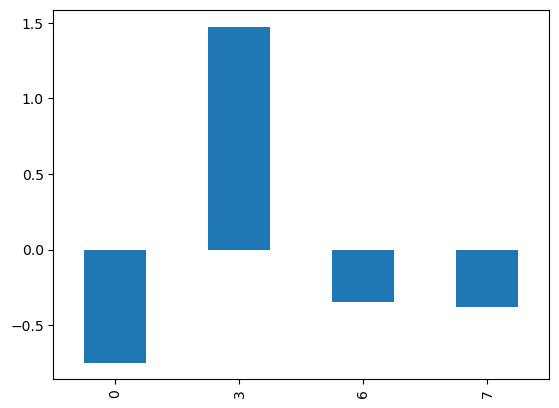

In [47]:
# INSERT CODE TO NORMALIZE THE COLUMN "housing_payment_usd" 

# df['housing_payment_usd'].plot(kind='bar')
df['housing_payment_usd'] = (df['housing_payment_usd'] - df['housing_payment_usd'].mean()) / df['housing_payment_usd'].std()
print(df)

df['housing_payment_usd'].plot(kind='bar')

In [48]:
# INSERT CODE TO RENAME THE COLUMN "housing_payment_usd" --> "housing_payment_normalized"
df.rename(columns={'housing_payment_usd':'housing_payment_normalized'}, inplace=True)

In [49]:
# PRINT THE DATA FRAME
print(df)

   customer_id  age_years account_balance_usd yearly_income_usd  \
0            1       32.0              1232.0          140230.0   
3            3       34.5             13023.0           56000.0   
6            6       53.0               143.0          261000.0   
7            7       53.0               143.0          261000.0   

   is_house_owner  housing_payment_normalized country_of_origin  
0             0.0                   -0.747008             "usa"  
3             1.0                    1.475213             "usa"  
6             0.0                   -0.347008             "mex"  
7             0.0                   -0.381196             "mex"  


Notice how the values for "housing_payment_normalized" are in the range -3 to 3, rather than 1000 to 2000$